# Time Series == Zamana Bağlı Regression

Stationary (Durağanlık) olması gerekiyor
1. Constant mean(Sabit ortalama)
2. Constant varience(Sabit varyans)
3. Auto covariance not depend on time(zamandan bağımsızlık)

Borsa 12 günlük verilerle incelenir.
Veri her zaman aynı saatte toplanmalıdır.

Dickey-Fuller Test, stationary checker

+ AR - I - MA
* Auto Regressive ( Otoregresif )
* Integration ( Entegrasyon )
* Moving Average ( Hareketli Ortalama )

In [24]:
#!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: >

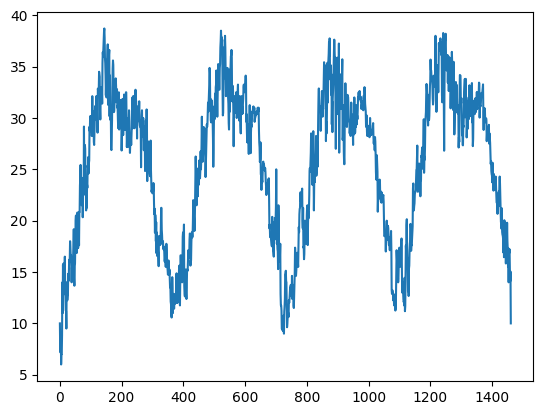

In [7]:
df.meantemp.plot() # cansız grafik

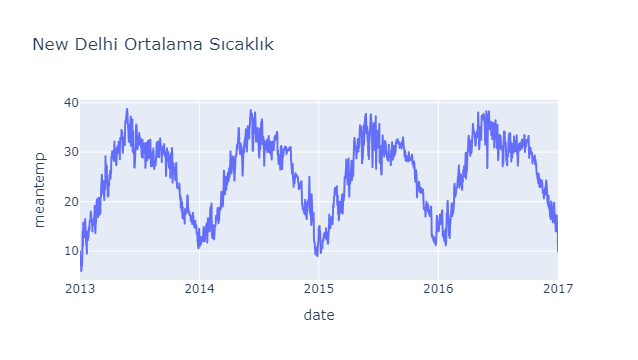

In [9]:
px.line(df,x="date",y="meantemp", title="New Delhi Ortalama Sıcaklık") # canlı grafik

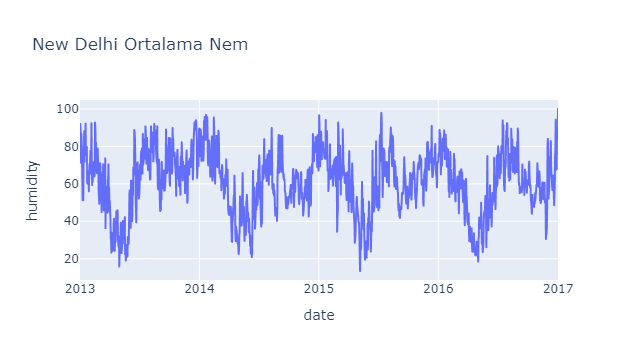

In [10]:
px.line(df,x="date",y="humidity", title="New Delhi Ortalama Nem")

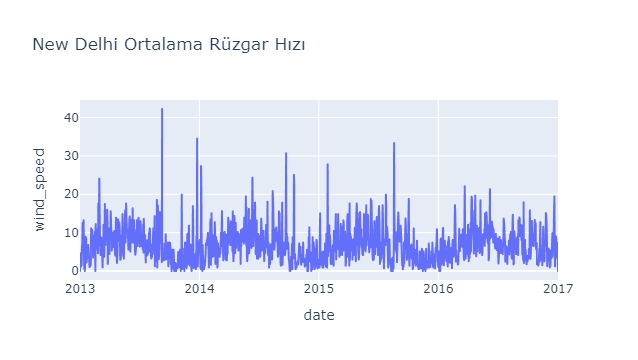

In [12]:
px.line(df,x="date",y="wind_speed", title="New Delhi Ortalama Rüzgar Hızı")

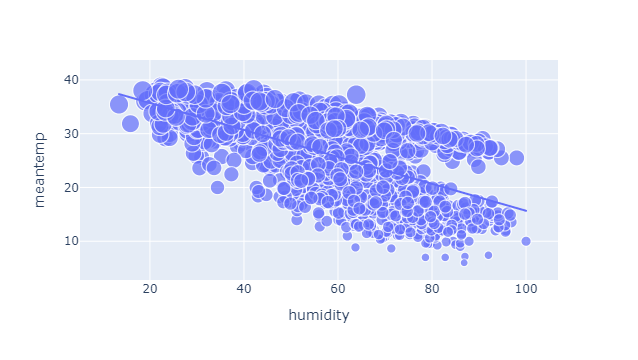

In [16]:
px.scatter(df,x="humidity",y="meantemp", size="meantemp",trendline="ols")

In [17]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [20]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [21]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5


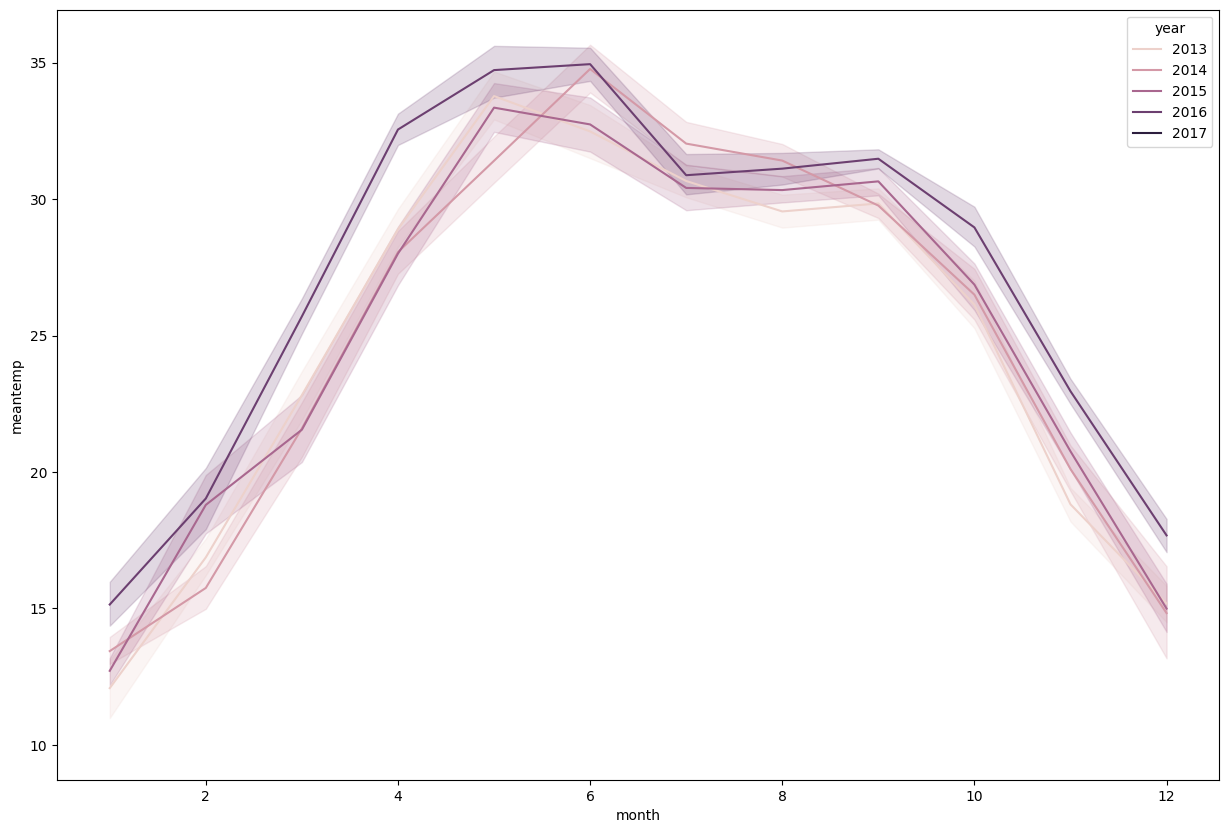

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x="month",y="meantemp",hue="year");

## Gelecek tahmini

In [28]:
#pip install prophet

In [29]:
# prophet y yazan sütunu tahmin ediyor, tarih ise ds olacak.

In [31]:
forecast_data=df.rename(columns={"date": "ds", "meantemp": "y"})

17:30:25 - cmdstanpy - INFO - Chain [1] start processing
17:30:25 - cmdstanpy - INFO - Chain [1] done processing


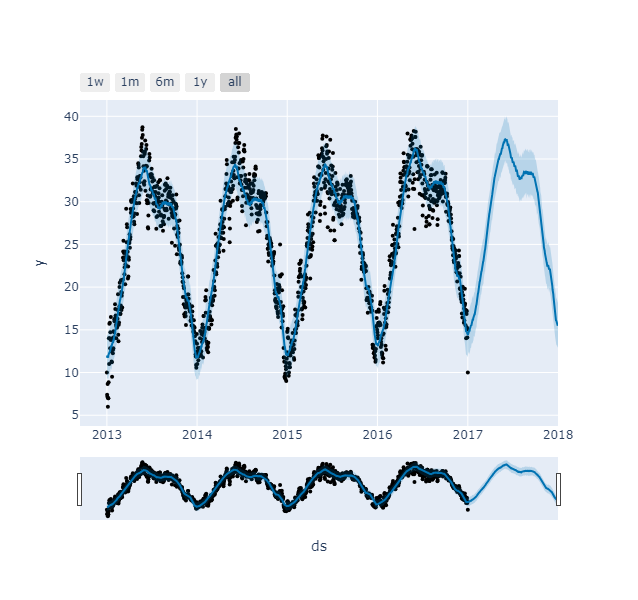

In [36]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365) # tahminde bulunmak istediğimiz sayı
predictions=model.predict(forecasts)
plot_plotly(model,predictions)